[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/2D_3D_Plot_Norparametric_homework2.ipynb)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
cd ./gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)

/content/gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import KernelDensity
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import os

## 1번 

### n = 50 , 200  Try different bandwitdths 
#### use bivariate normal kernel  and product kernel with $K_{0}$ the Epanechnikov kernel
# $$ N( (0, 0 ) ,( 1 , 0.5 ,0.5, 1) ) $$

d = dimension

Product kernel :  $ K^{P}(X) = \sum_{i=1}^d K(X_{i}) $

Normal kernel  : $ (2\pi)^{- \frac{d}{2} }  exp( (x- x_{i})^{T}(x-x_{i} )) $

## Comment
* 다른 bandwidth 으로 bivariate kernel 과 product kernel 을 적용해 봤습니다.
* 이변량 가우시안 분포를 Size 별로 샘플링 한 후 bandwdith 과 kernel 에 따라서 다르게 plot을 시각화 해봤습니다.
* scroe_samples 이라는 것을 이용해 넣은 데이터에 대해서 density_model을 평가해서 색깔이 진하면 진할수록 확률 값이 높다는 의미입니다.
* Product kernel $ K^{P}(X) = \sum_{i=1}^d K(X_{i}) $ 이라고 정의가 되어 있으므로 kernel을 차원의 수만큼 곱해준다고 생각하여
 * score_samples * score_samples( dens*dens) 를 해줘서 표현했습니다.


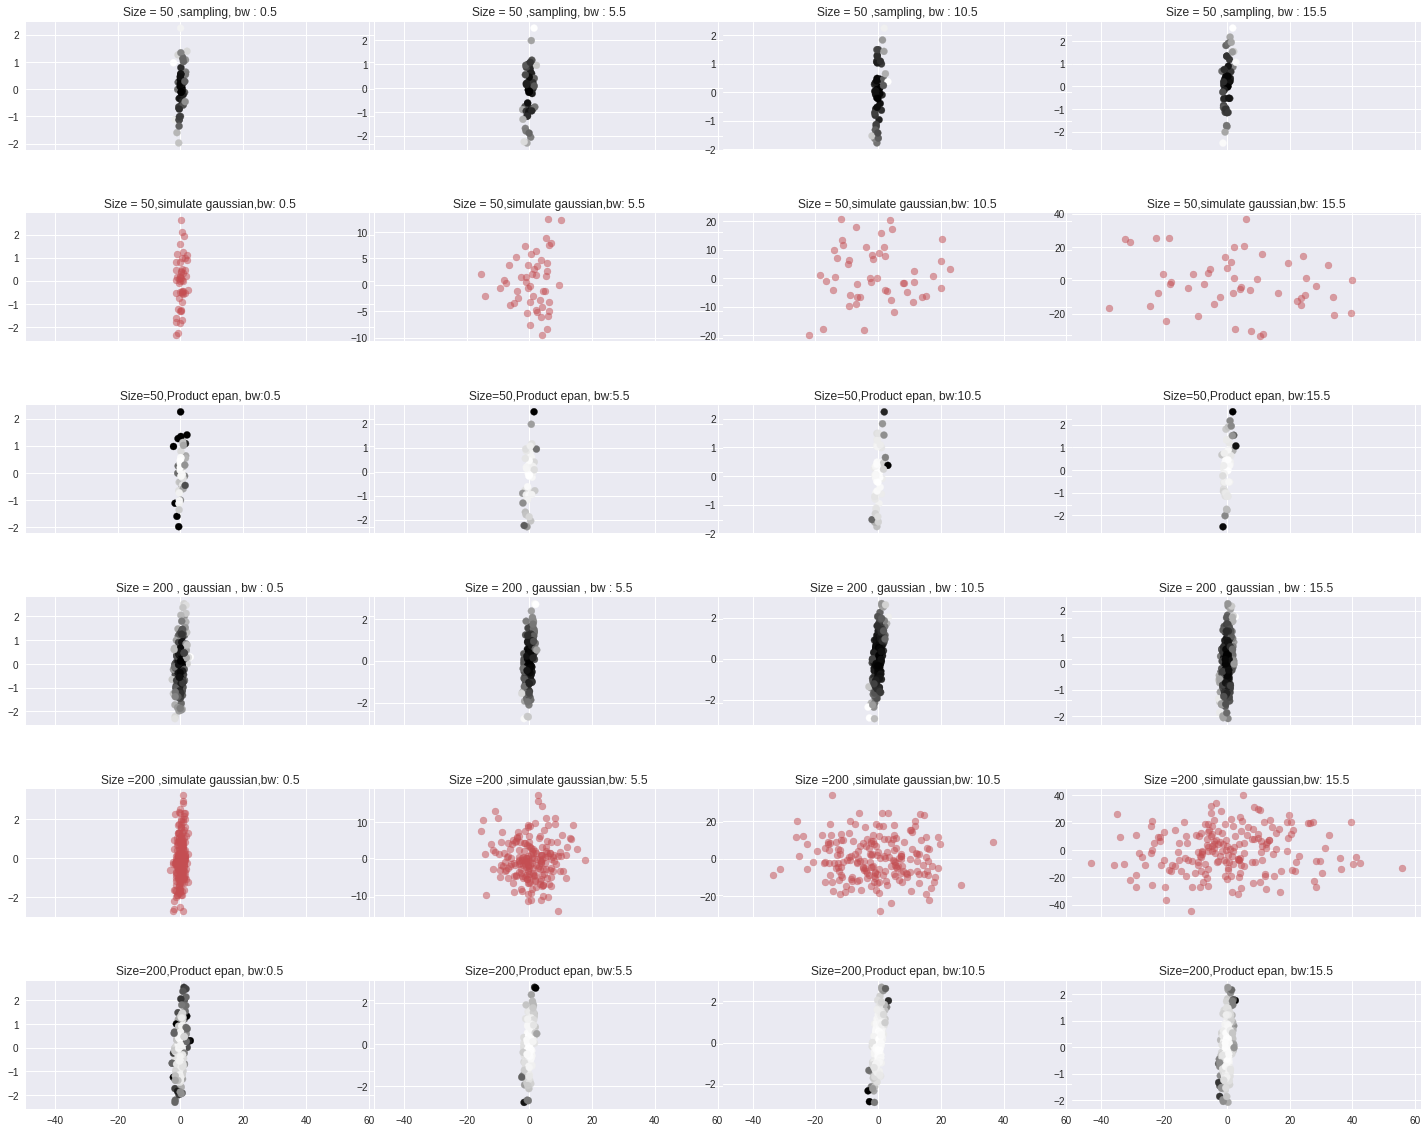

In [5]:

mean =[ 0, 0]
cov  = [[1.0, 0.5], [0.5, 1.0 ]]

fig, axs = plt.subplots(6,4, figsize=(25, 20), facecolor='w', edgecolor='k' , sharex=True)
fig.subplots_adjust(hspace = 0.5 , wspace=.001)

axs = axs.ravel()

## 초기 BANDWITH  = 0,5  iteration 마다 5씩 증가 
bandwidth = 0.5 
for i in range(4) :
    size = 50
    X  = np.random.multivariate_normal( mean , cov , size= size )
    
    """
    N = 50 , Gaussian Kernel 
    """
    kde = KernelDensity(kernel='gaussian', bandwidth= bandwidth ).fit(X)
    dens = kde.score_samples( X )
    axs[i].scatter(X[:,0],X[:, 1 ], c= dens )
    axs[i].set_title("Size = 50 ,sampling, bw : "+str(bandwidth))
    X1 = kde.sample( size )
    axs[i+4].scatter(X1[:,0],X1[:, 1 ], c= "r", alpha = 0.5  )
    axs[i+4].set_title("Size = 50,simulate gaussian,bw: "+str(bandwidth))    
    kde = KernelDensity(kernel='epanechnikov', bandwidth= bandwidth ).fit(X)
    dens = kde.score_samples( X )
    """
    N = 50 , Product Kernel
    """
    dens = dens* dens 
    axs[i+8].scatter(X[:,0],X[:, 1 ], c= dens )
    axs[i+8].set_title("Size=50,Product epan, bw:"+str(bandwidth))
    size2 = 200 
    X2 = np.random.multivariate_normal( mean , cov , size= size2 )
    
    """
    N = 200 , Gaussian Kernel 
    """
    kde = KernelDensity(kernel='gaussian', bandwidth= bandwidth ).fit(X2)
    dens = kde.score_samples( X2 )
    axs[i+12].scatter(X2[:,0],X2[:, 1 ], c= dens )
    axs[i+12].set_title("Size = 200 , gaussian , bw : "+str(bandwidth))
    
    X1 = kde.sample( size2 )
    axs[i+16].scatter(X1[:,0],X1[:, 1 ], c= "r", alpha = 0.5  )
    axs[i+16].set_title("Size =200 ,simulate gaussian,bw: "+str(bandwidth))    
    kde = KernelDensity(kernel='epanechnikov', bandwidth= bandwidth ).fit(X2)
    dens = kde.score_samples( X2 )
    """
    N = 200 Product Kernel 부분 
    """
    dens = dens * dens 
    axs[i+20].scatter(X2[:,0],X2[:, 1 ], c= dens )
    axs[i+20].set_title("Size=200,Product epan, bw:"+str(bandwidth))
    
    bandwidth += 5.0


plt.savefig("homework2.png")
plt.show()


## 3D Plot and Contour Plot  Bivariate Gaussian distribution

### Comment 
* 3D PLOT 을 그려보왔습니다. 색깔이 찐할수록 그 부분에 확률 값이 높다는 뜻입니다.
* 마찬가지로 Contour도 색깔이 찐한 곳이 더 확률 값이 높고 등고선의 간격을 통해  이 확률 값이 변화의 정도를 인지할 수 있습니다.


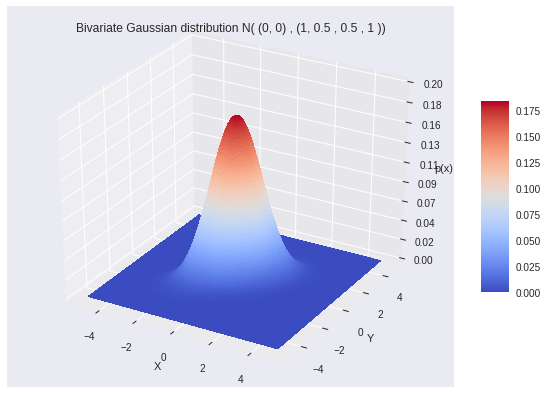

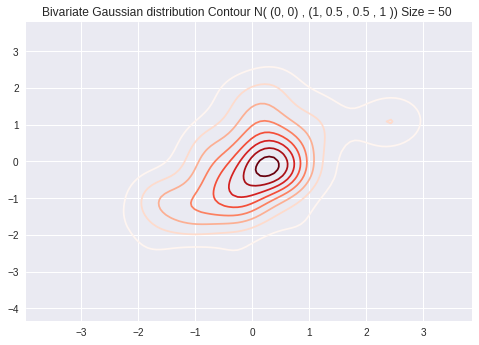

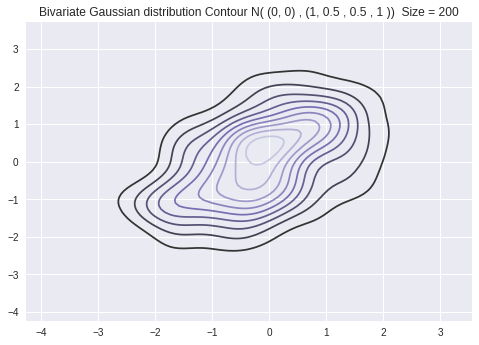

In [6]:
import warnings
warnings.filterwarnings('ignore')


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)

cov_test = np.array([[1, 0.5 ],
                    [ 0.5 ,1]])

mean_x  = 0 
mean_y  = 0
"""
3D PLOT을 그렸습니다.
"""
Z = bivariate_normal(X, Y ,cov_test[0,0], cov_test[1,1], mean_x, mean_y , cov_test[0,1]  )
surf = ax.plot_surface(X, Y, Z, rstride=1,
        cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gaussian distribution N( (0, 0) , (1, 0.5 , 0.5 , 1 ))')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

"""
Contour 에 SIZE 50, 200 으로 다르게 해서 확인해 봤습니다.
"""

## contour
mean, cov = [0, 0], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y, cbar= True , cmap="Reds" )
plt.title('Bivariate Gaussian distribution Contour N( (0, 0) , (1, 0.5 , 0.5 , 1 )) Size = 50 ')
plt.show()

## contour
mean, cov = [0, 0], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=200).T
ax = sns.kdeplot(x, y, cmap="Purples_d" , cbar= True  )
plt.title('Bivariate Gaussian distribution Contour N( (0, 0) , (1, 0.5 , 0.5 , 1 ))  Size = 200')
plt.show()

## 요즘 주로 사용한 Creditcrad를 이용해 분석을 해봤습니다.
* 다만 이 변수들은 확인 결과 PCA Transformation으로 인한 결과라서 이 데이터에 변수에 대한 정보는 특정 나와있는 변수를 제외하고는  얻을 수가 없었습니다. 

In [0]:
data = pd.read_csv("creditcard.csv")

In [17]:
# "변수가 구체적으로 명시가 안되어 있습니다."
print("열의 개수" , np.shape(data)[0] )
data.columns

열의 개수 284807


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## 데이터 변수들의 일반적인 Histogram 그림
* 일반적인 hist 를 그려서 산포도를 확인해보고  modal 의 수가 많아 보이는 것을 찾아서 해보려고 했습니다.

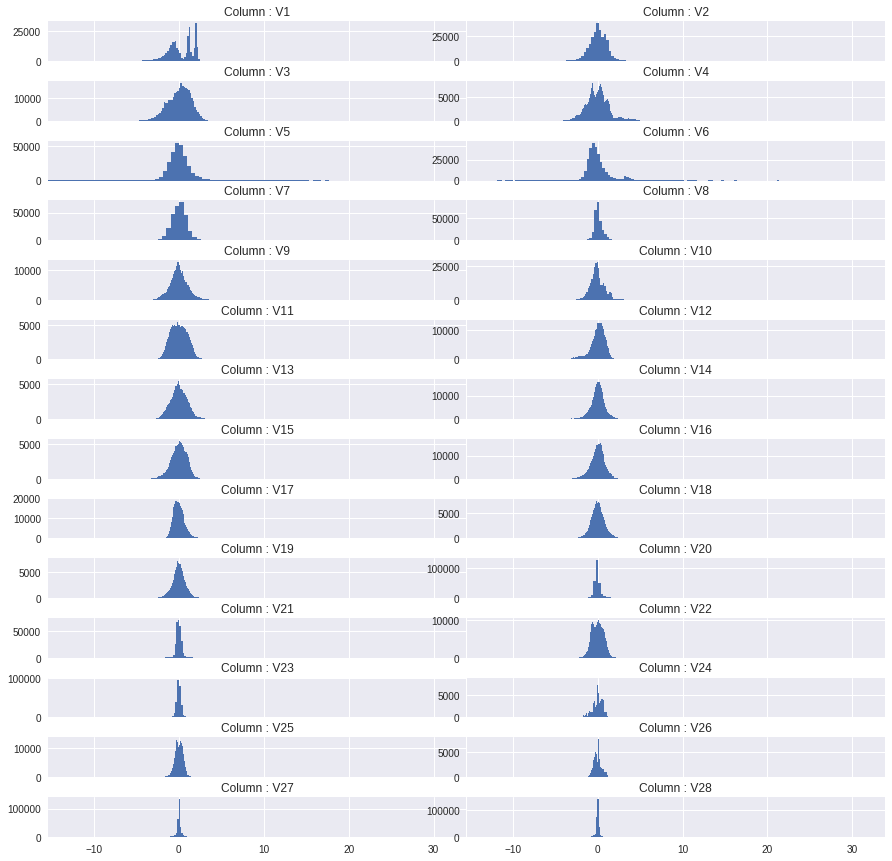

In [13]:
fig, axs = plt.subplots(14, 2 , figsize=(15, 15), facecolor='w', edgecolor='k' , sharex=True)
fig.subplots_adjust(hspace = 0.5 , wspace=.001)

axs = axs.ravel()
name = data.columns
for i in range(28) : 
    axs[i].hist(data.iloc[: , i+1 ] ,bins =320)
    axs[i].set_title("Column : "+ name[i+1])
    axs[i].set_xlim( xmin =  data.iloc[: , i+1 ].min() , xmax = data.iloc[: , i+1 ].max())

plt.show()

## 그래서 Columns  V6 과 V24를 뽑아서  분석해봤습니다.

### Comment
* 데이터의 개수가 많아서 5000개 정도만 뽑아서 진행하였습니다.
* Gaussian Kernel 
* Bandwidth = 0.5 로 지정해서 해봤습니다.
* 색깔이 진하면 진할수록 데이터가 모여있는 곳입니다.

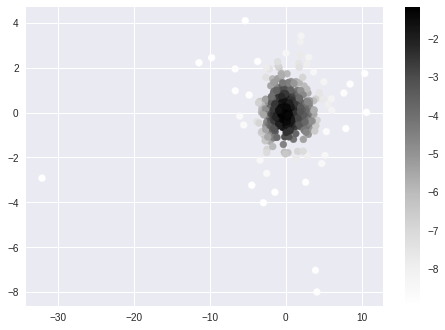

In [19]:
X = data.iloc[:5000, [5, 23 ]].values
bandwidth = 0.5 
kde = KernelDensity(kernel='gaussian', bandwidth= bandwidth ).fit(X)
dens = kde.score_samples( X )
plt.scatter(X[:,0],X[:, 1 ], c= dens )
cbar= plt.colorbar()
plt.show()

## Kerdensity Plot 그리기 
* from sklearn.neighbors import KernelDensity
* Kernel = 1.  Gaussian , 2.  Epanechnikov
* Bandwidth 을 0.5 부터 시작해 2씩 증가시켜서 시각화해봤습니다.
* Bandwidth 을 늘릴수록 확률값이 높게 측정되는 부분이 넓이지는 것을 확인 할 수 있습니다.

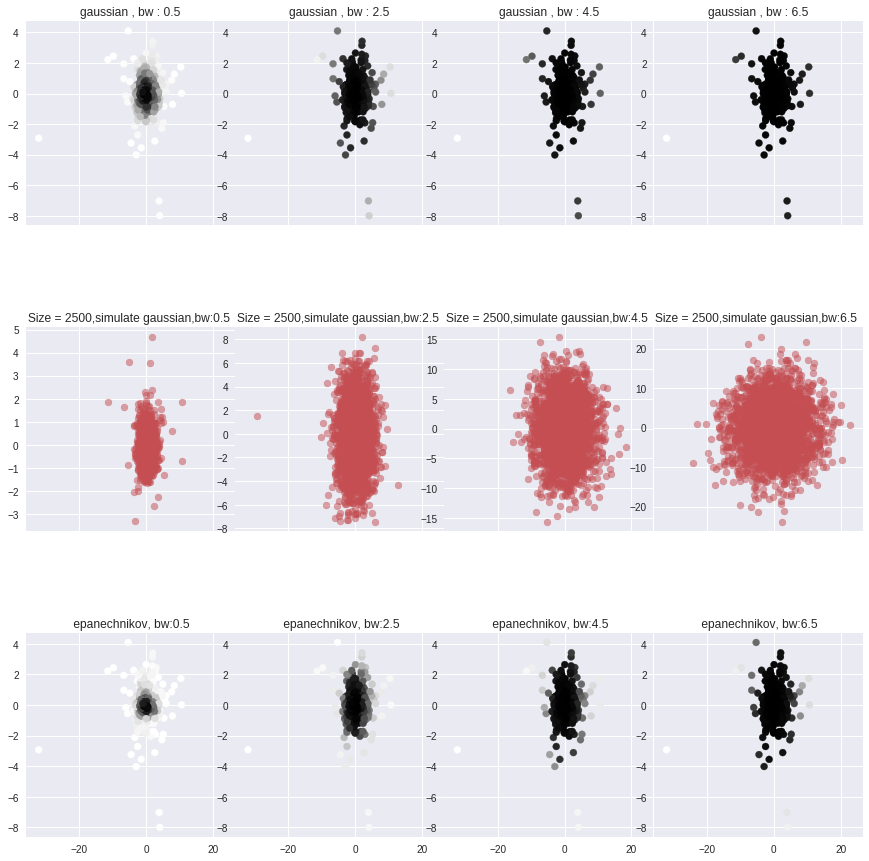

CPU times: user 24.7 s, sys: 2.19 s, total: 26.9 s
Wall time: 23.9 s


In [20]:
%%time
fig, axs = plt.subplots(3,4, figsize=(15, 15), facecolor='w', edgecolor='k' , sharex=True)
fig.subplots_adjust(hspace = 0.5 , wspace=.001)
X = data.iloc[:5000, [5, 23 ]].values
axs = axs.ravel()

bandwidth = 0.5 
for i in range(4) :
    kde = KernelDensity(kernel='gaussian', bandwidth= bandwidth ).fit(X)
    dens = kde.score_samples( X )
    axs[i].scatter(X[:,0],X[:, 1 ], c= dens )
    axs[i].set_title("gaussian , bw : "+str(bandwidth))
    X1 = kde.sample( np.int(len(X)/2) )
    axs[i+4].scatter(X1[:,0],X1[:, 1 ], c= "r", alpha = 0.5  )
    axs[i+4].set_title("Size = {0},simulate gaussian,bw:{1} ".format(  np.int(len(X)/2) , str(bandwidth)))
    kde = KernelDensity(kernel='epanechnikov', bandwidth= bandwidth ).fit(X)
    dens = kde.score_samples( X )
    axs[i+8].scatter(X[:,0],X[:, 1 ], c= dens )
    axs[i+8].set_title(" epanechnikov, bw:"+str(bandwidth))
    bandwidth += 2.0

    
plt.show()


## V6 과 V24의 변수를 Contour Plot으로 시각화해보기
* bandwidht  = 0.5  , kernel = epa
* rugplot을 이용해 변수가 어디에 주로 분포되어있는지를 확인도 같이 했습니다.


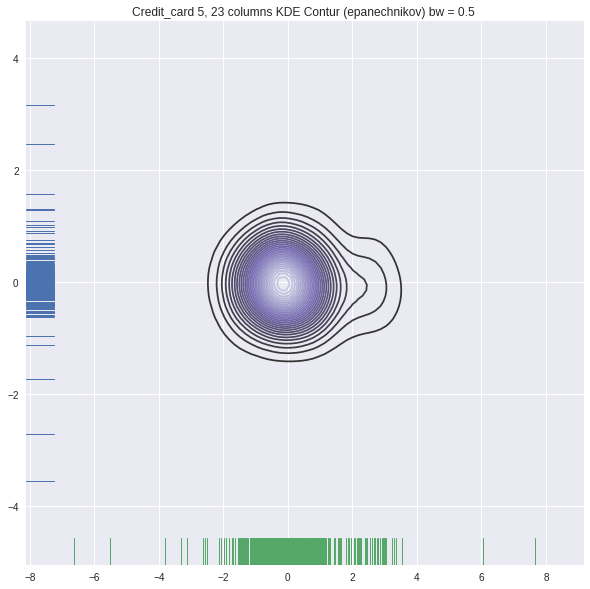

CPU times: user 3.21 s, sys: 249 ms, total: 3.46 s
Wall time: 3.13 s


In [21]:
%%time 
plt.figure( figsize=(10, 10))
x , y= data.iloc[:500, [5, 23 ]].values.T
ax = sns.kdeplot(x, y, n_levels=30, cmap="Purples_d" , cbar= True  , kernel ="epa" , bw = 0.5  )
sns.rugplot( x, color="g", ax=ax)
sns.rugplot( y, vertical=True, ax=ax);
plt.title('Credit_card 5, 23 columns KDE Contur (epanechnikov) bw = 0.5 ')
plt.show()


# Contour Plot 그리기
## Kernel = (1 . Gaussian , 2 . Epanechnikov)
## Bandwidth = 0.1 에서 시작해서 0.15 씩 증가시키기
* import seaborn as sns
* sns에서 사용가능한  kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }
* kernel 보다는 bandwidth에 따라서 분포의 모양이 많이 바뀜을 확인을 하였습니다.
* 그리고 bimodal 형태를 띄는 것 같습니다.

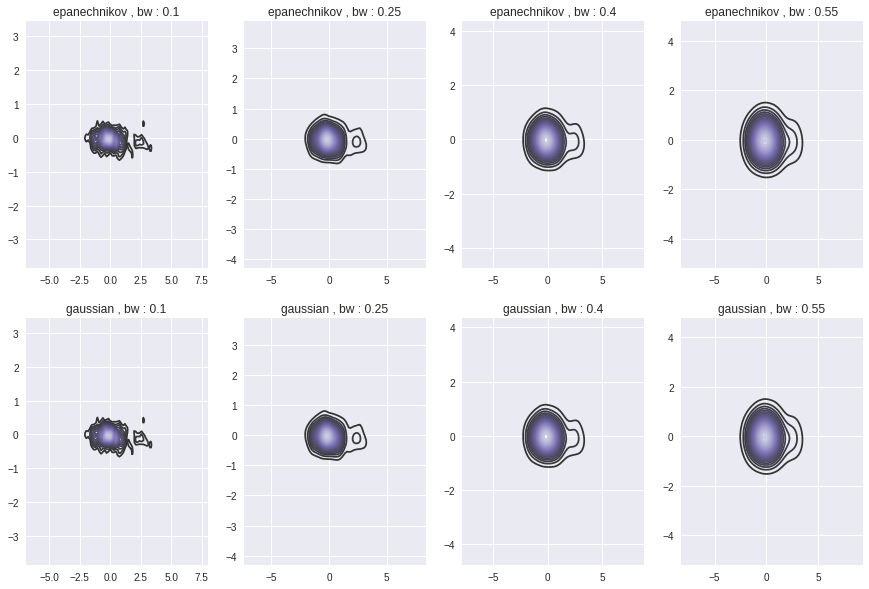

CPU times: user 7.31 s, sys: 477 ms, total: 7.78 s
Wall time: 7.13 s


In [30]:
%%time
x , y= data.iloc[:500, [5, 23 ]].values.T

plt.figure( figsize=( 15 , 10 ))
bandwidth = 0.1
for i in range(1,5) :
    
    plt.subplot(int(str(24)+str(i)))
    sns.kdeplot(x, y, n_levels=30, cmap="Purples_d" , cbar= True  , kernel ="epa" , bw = bandwidth  )
    plt.title("epanechnikov , bw : "+str(bandwidth))
    plt.subplot(int(str(24)+str(i+4)))
    sns.kdeplot(x, y, n_levels=30, cmap="Purples_d" , cbar= True  , kernel ="gau" , bw = bandwidth  )
    plt.title("gaussian , bw : "+str(bandwidth))
    bandwidth += 0.15


plt.show()

# Kde Plot ( Kernel들 한번에 그려서 살펴보기) 
* Defalut Bandwidth = "Scott" (Rules of sum)
* Default Kernel = "Gaussian"
* kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]
* bandwidth을 따로 상수로 설정해주면 그 해당 수를 Bandwidth로 설정되지만 Scott 을 이용한 최적화된 bw으로 그림을 그려봄

#  Comment
* 아래의 그림은  V24 "biw", "cos", "epa", "gau", "tri", "triw" 커널을 활용하고 Scott 이라는 bandwidth을 사용해서 그림을 그려봤습니다. gaussian이 가장 Smooth 하게 나오고 다른 것들은 Nonsmooth한 형태로 나오는 것을 확인했습니다.
* V6 , V24 를 Countour plot을 하고 bw 를 고정하고 kernel만 바꿧을 때 거의 차이가 없이 마치 하나로 겹친든한 모양 인것을 확인할 수 있었습니다.

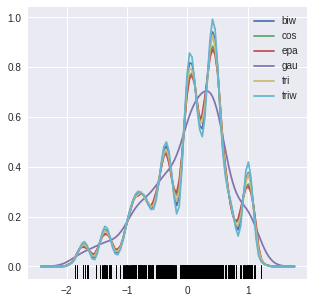

No handles with labels found to put in legend.


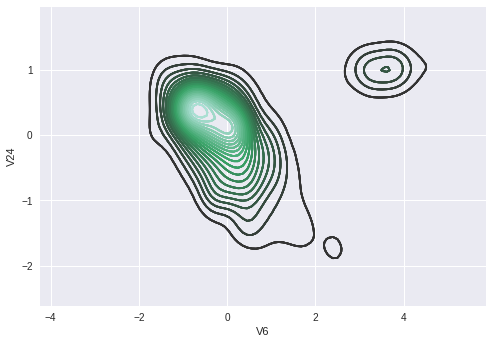

In [35]:
fig = plt.figure(figsize=(5, 5))

data.V19
dataset = data.loc[:500, ["V6", "V24" ]]

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]
sns.rugplot(dataset.V24 ,color='black')
for kern in kernel_options:
    sns.kdeplot(dataset.V24 ,kernel=kern,label=kern )

plt.show()




for kern in kernel_options:
    sns.kdeplot( dataset.V6 , dataset.V24  , kernel= kern, label=kern , bw= 0.25 , n_levels = 20 )
plt.legend( loc = 1 )
plt.show()
    



## V4 ,V14 , V22 에 대한 Scatter Plot , Kenrel Density , Contour Plot  시각화

## 3D plot 그리기
* plot_surface
* 특정 좌표값에 대한 확률값도 추출 가능하다.
* v6과 v24 변수를 이용함
* gaussian kernel 과 bandwidth = 2 로 설정한 3D plot 그려봄
* bandwith 2 , scott , silverman 3가지를 각각 구해봤습니다.

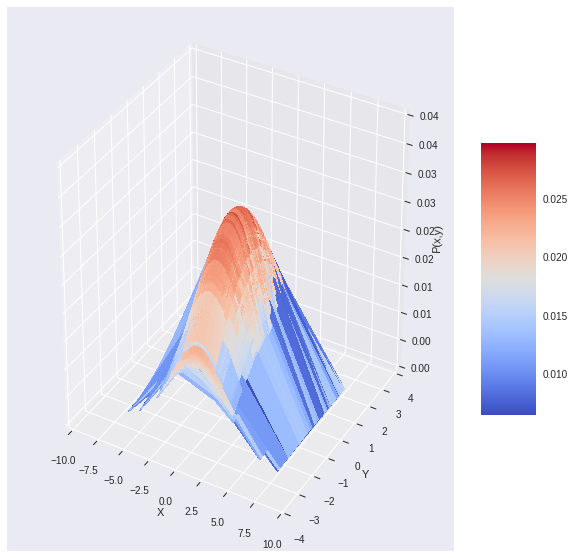

[0.0165669  0.01933977]


In [37]:
#bw_method = scott / silverman  / scalar

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



fig = plt.figure( figsize = (10, 10 ))
ax = fig.gca(projection='3d')
data2 = data.iloc[:500, [5, 13 ]].values
X = data2[:, 0]
Y = data2[:, 1]
XX =X
YY =Y
XX, YY = np.meshgrid(X, Y)
positions = np.vstack([XX.ravel(), YY.ravel()])
values = np.vstack([X, Y])
kernel = st.gaussian_kde(values , bw_method= 2 )

f = np.reshape(kernel(positions).T, (500, 500))
surf = ax.plot_surface(XX, YY, f, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth= 0 ,  antialiased=False)

ax.set_zlim(0.0, 0.04)
ax.set_xlim(-10.0 , 10.0)
ax.set_ylim(-4.0 , 4.0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('P(x,y)')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## V6 과 V24 변수 이용
* Gaussian Kernel 과 Bandwidth : Silverman 을 사용해서 3D Plot 시각화

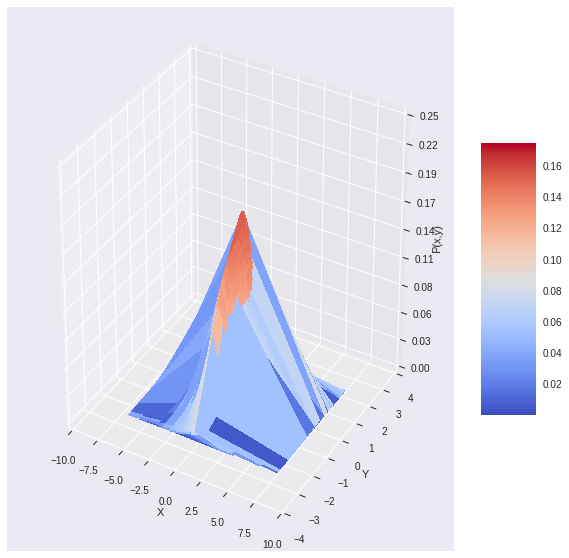

[0.00695605 0.0066905 ]


In [38]:
#bw_method = scott / silverman / scalar

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
data2 = data.iloc[:500, [5, 13 ]].values
X = data2[:, 0]
Y = data2[:, 1]
XX =X
YY =Y
XX, YY = np.meshgrid(X, Y)
positions = np.vstack([XX.ravel(), YY.ravel()])
values = np.vstack([X, Y])
kernel = st.gaussian_kde(values , bw_method= "silverman" )

f = np.reshape(kernel(positions).T, (500, 500))
surf = ax.plot_surface(XX, YY, f, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth= 0 ,  antialiased=False)
#cset = ax.contour(XX, YY, f, zdir='z', offset = 0, cmap=cm.coolwarm)
#cset = ax.contour(XX, YY, f, zdir='y', offset = 4, cmap=cm.coolwarm)
#cset = ax.contour(XX, YY, f, zdir='x', offset = -4, cmap=cm.coolwarm)

ax.set_zlim(0.0, 0.25)
ax.set_xlim(-10.0 , 10.0)
ax.set_ylim(-4.0 , 4.0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('P(x,y)')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



# V6 과 V24 3D plot
* Kernel : Gaussian
* BandWidth : Scott 

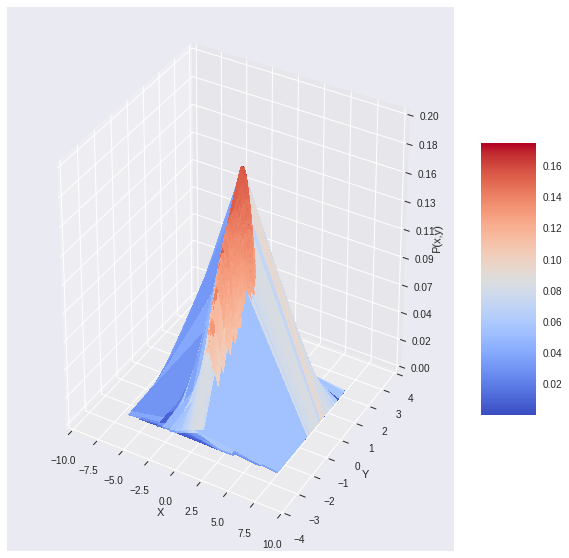

[0.00695605 0.0066905 ]


In [39]:
#bw_method = scott / silverman / scalar

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
data2 = data.iloc[:500, [5, 13 ]].values
X = data2[:, 0]
Y = data2[:, 1]
XX =X
YY =Y
XX, YY = np.meshgrid(X, Y)
positions = np.vstack([XX.ravel(), YY.ravel()])
values = np.vstack([X, Y])
kernel = st.gaussian_kde(values , bw_method= "scott" )

f = np.reshape(kernel(positions).T, (500, 500))
surf = ax.plot_surface(XX, YY, f, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth= 0 ,  antialiased=False)
#cset = ax.contour(XX, YY, f, zdir='z', offset = 0, cmap=cm.coolwarm)
#cset = ax.contour(XX, YY, f, zdir='y', offset = 4, cmap=cm.coolwarm)
#cset = ax.contour(XX, YY, f, zdir='x', offset = -4, cmap=cm.coolwarm)

ax.set_zlim(0.0, 0.2)
ax.set_xlim(-10.0 , 10.0)
ax.set_ylim(-4.0 , 4.0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('P(x,y)')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

